In [58]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, ShuffleSplit
from utils import plot_learning_curve, my_load_wine, print_tree, get_estimator_final_score, plot_loss_curve
import graphviz 

# Neural Networks
## Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Playing with the number of hidden layers

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

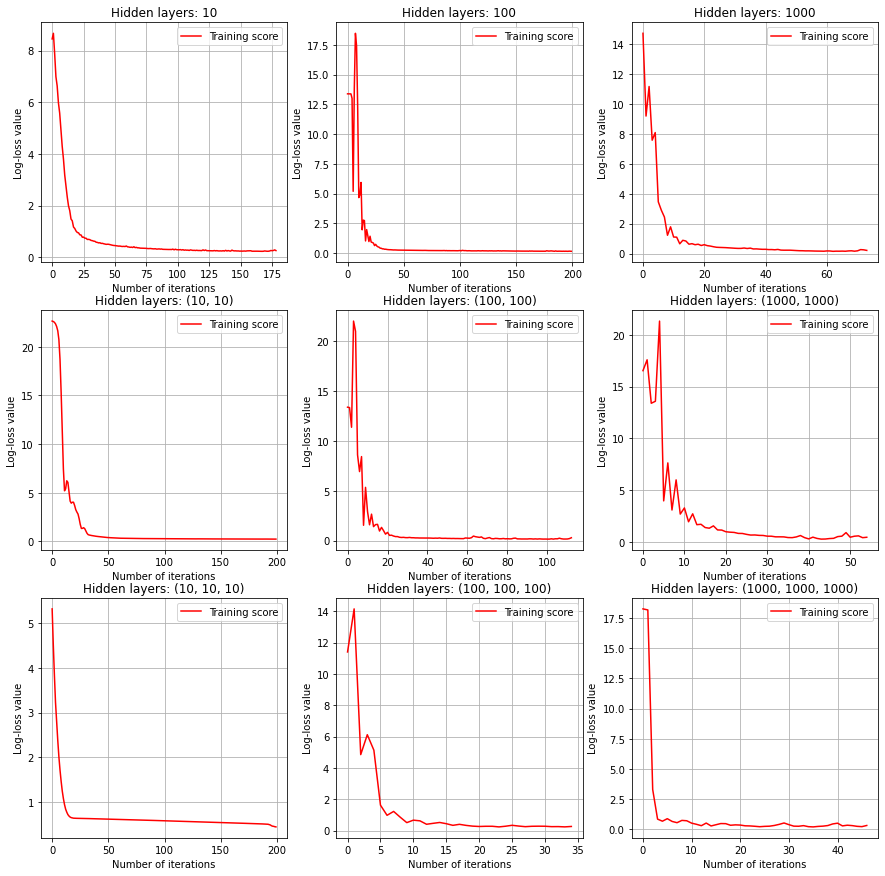

In [12]:
architectures = [
    (10),
    (100),
    (1000),
    (10, 10),
    (100, 100),
    (1000, 1000),
    (10, 10, 10),
    (100, 100, 100),
    (1000, 1000, 1000),
]
grid_size = 3
_, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
for i, architecture in enumerate(architectures):
    axe_to_plot = axes[int(i/len(axes)), (i%len(axes[0]))]
    estimator = MLPClassifier(hidden_layer_sizes=architecture, random_state=42)
    estimator.fit(X_train, y_train)
    title = f"Hidden layers: {architecture}"
    plot_loss_curve(estimator, title, X_train, y_train, axes=axe_to_plot, detailed=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


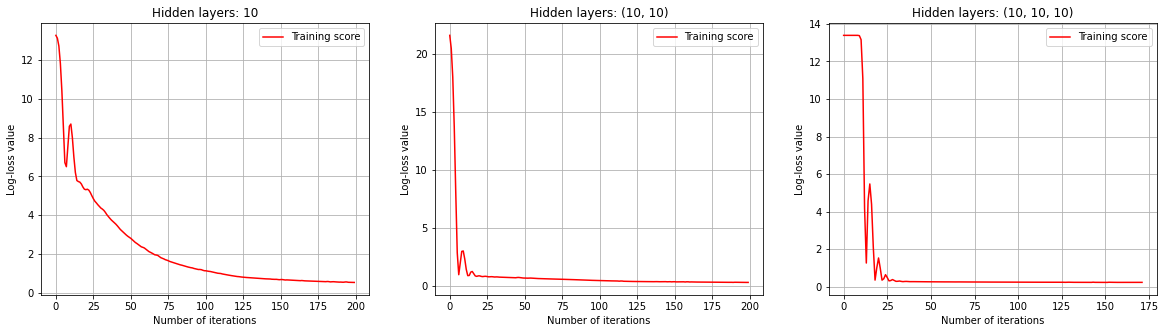

In [30]:
architectures = [
    (10),
    (10, 10),
    (10, 10, 10),
]
_, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, architecture in enumerate(architectures):
    axe_to_plot = axes[i]
    estimator = MLPClassifier(hidden_layer_sizes=architecture, random_state=42)
    estimator.fit(X_train, y_train)
    title = f"Hidden layers: {architecture}"
    plot_loss_curve(estimator, title, X_train, y_train, axes=axe_to_plot, detailed=True)

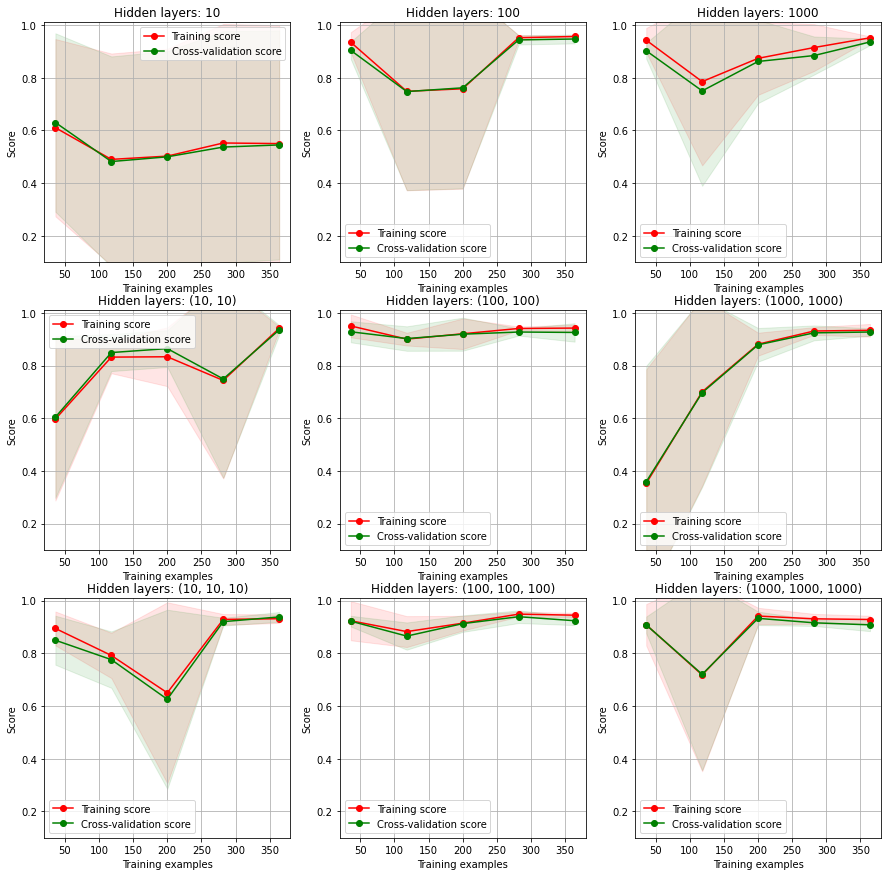

In [15]:
grid_size = 3
_, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))
architectures = [
    (10),
    (100),
    (1000),
    (10, 10),
    (100, 100),
    (1000, 1000),
    (10, 10, 10),
    (100, 100, 100),
    (1000, 1000, 1000),
]
ylim = (0.1, 1.01)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i, architecture in enumerate(architectures):
    axe_to_plot = axes[int(i/len(axes)), (i%len(axes[0]))]
    title = f"Hidden layers: {architecture}"
    estimator = MLPClassifier(hidden_layer_sizes=architecture)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=16, scoring="f1")

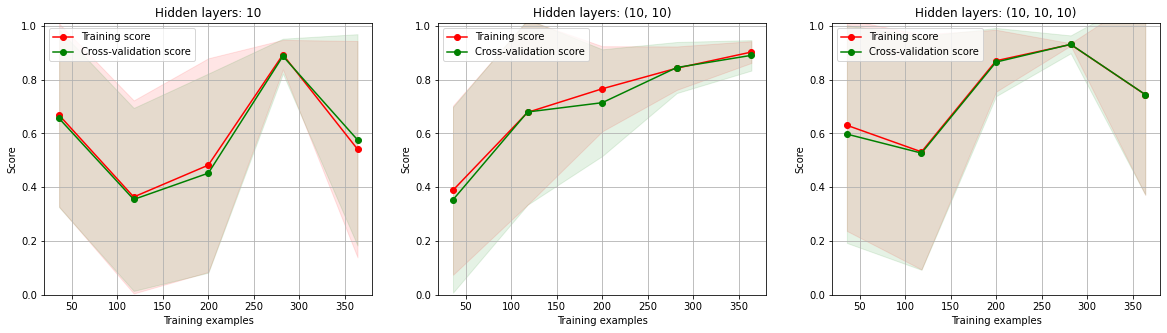

In [55]:
grid_size = 3
_, axes = plt.subplots(1, grid_size, figsize=(20, 5))
architectures = [
    (10),
    (10, 10),
    (10, 10, 10),
]
ylim = (0, 1.01)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i, architecture in enumerate(architectures):
    axe_to_plot = axes[i]
    title = f"Hidden layers: {architecture}"
    estimator = MLPClassifier(hidden_layer_sizes=architecture, random_state=42)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=16, scoring="f1")

### Playing with the activations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

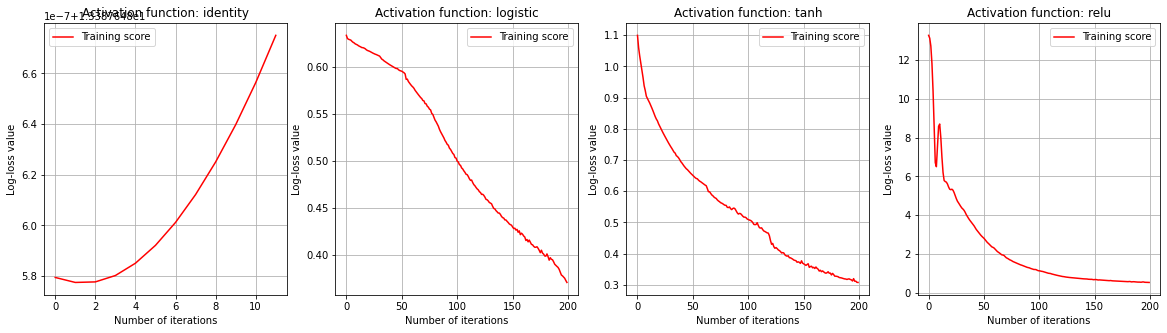

In [73]:
activations= ["identity", "logistic", "tanh", "relu"]
_, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, activation in enumerate(activations):
    axe_to_plot = axes[i]
    estimator = MLPClassifier(activation=activation, hidden_layer_sizes=(10), random_state=42)
    estimator.fit(X_train, y_train)
    title = f"Activation function: {activation}"
    plot_loss_curve(estimator, title, X_train, y_train, axes=axe_to_plot, detailed=True)

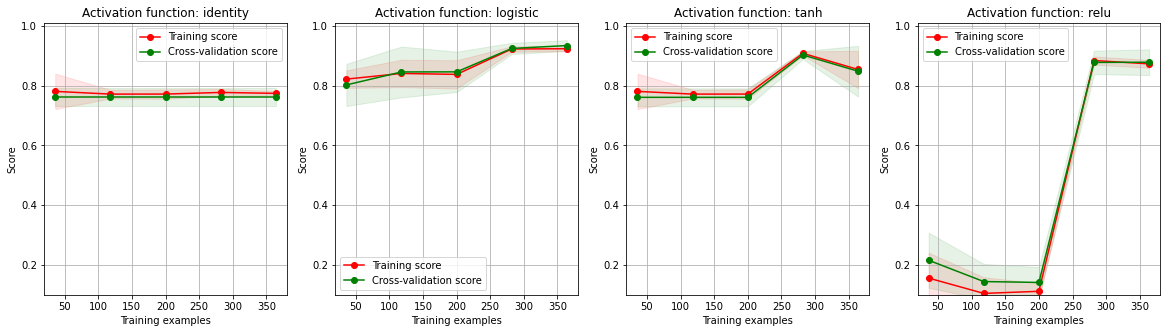

In [80]:
activations= ["identity", "logistic", "tanh", "relu"]
_, axes = plt.subplots(1, 4, figsize=(20, 5))
ylim = (0.1, 1.01)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for i, activation in enumerate(activations):
    estimator = MLPClassifier(activation=activation, hidden_layer_sizes=(10), random_state=42)
    axe_to_plot = axes[i]
    title = f"Activation function: {activation}"
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=16, scoring="f1")

In [82]:
# Final evaluation
estimator = MLPClassifier(activation="logistic", hidden_layer_sizes=(10, 10), random_state=42)
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "(10, 10) and logistic activation", "f1")

Test f1 score for (10, 10) and logistic activation: 0.7675675675675676


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7675675675675676

## Wine Quality Data Set

In [83]:
wine = my_load_wine("../Datasets/wine/")
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Playing with the hidden layers

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


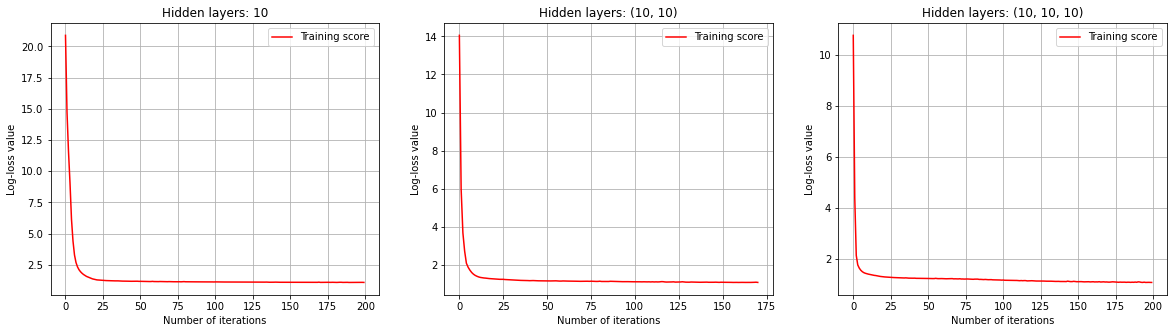

In [84]:
architectures = [
    (10),
    (10, 10),
    (10, 10, 10),
]
_, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, architecture in enumerate(architectures):
    axe_to_plot = axes[i]
    estimator = MLPClassifier(hidden_layer_sizes=architecture, random_state=42)
    estimator.fit(X_train, y_train)
    title = f"Hidden layers: {architecture}"
    plot_loss_curve(estimator, title, X_train, y_train, axes=axe_to_plot, detailed=True)

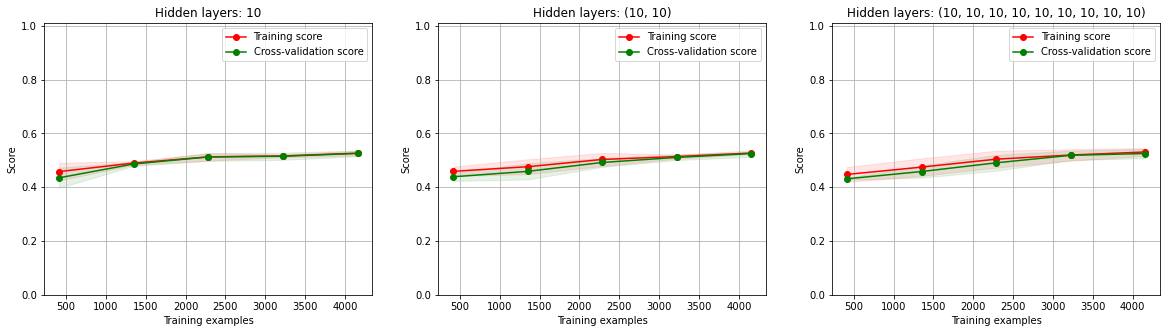

In [93]:
grid_size = 3
_, axes = plt.subplots(1, grid_size, figsize=(20, 5))
architectures = [
    (10),
    (10, 10),
    (10, 10, 10, 10, 10, 10, 10, 10, 10),
]
ylim = (0, 1.01)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for i, architecture in enumerate(architectures):
    axe_to_plot = axes[i]
    title = f"Hidden layers: {architecture}"
    estimator = MLPClassifier(hidden_layer_sizes=architecture, random_state=1)
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=16, scoring="accuracy")

### Playing with the activations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

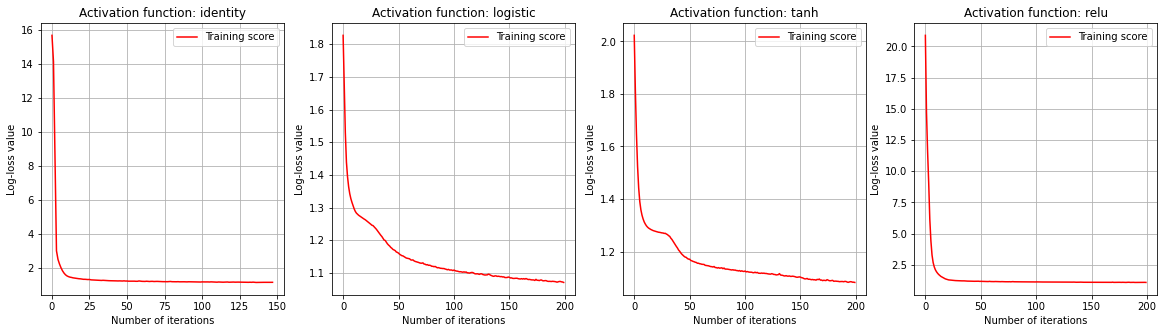

In [91]:
activations= ["identity", "logistic", "tanh", "relu"]
_, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, activation in enumerate(activations):
    axe_to_plot = axes[i]
    estimator = MLPClassifier(activation=activation, hidden_layer_sizes=(10), random_state=42)
    estimator.fit(X_train, y_train)
    title = f"Activation function: {activation}"
    plot_loss_curve(estimator, title, X_train, y_train, axes=axe_to_plot, detailed=True)

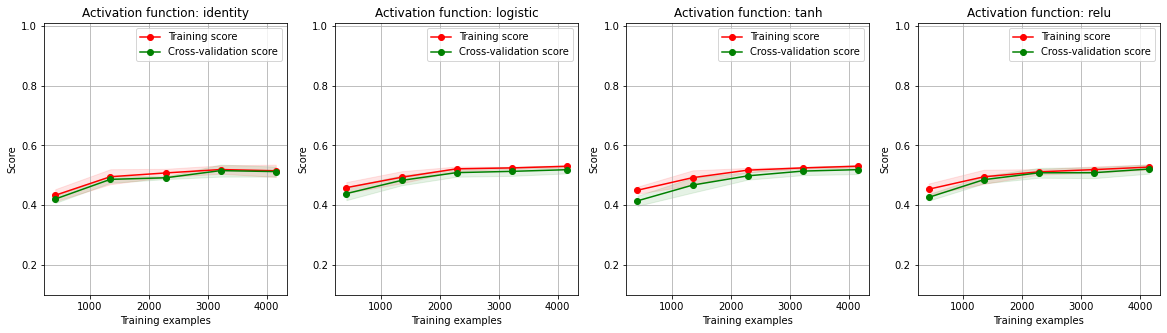

In [90]:
activations= ["identity", "logistic", "tanh", "relu"]
_, axes = plt.subplots(1, 4, figsize=(20, 5))
ylim = (0.1, 1.01)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for i, activation in enumerate(activations):
    estimator = MLPClassifier(activation=activation, hidden_layer_sizes=(10), random_state=42)
    axe_to_plot = axes[i]
    title = f"Activation function: {activation}"
    plot_learning_curve(estimator, title, X_train, y_train, axes=axe_to_plot, ylim=ylim, cv=cv, n_jobs=16, scoring="accuracy")

In [99]:
# Final evaluation
estimator = MLPClassifier(activation="relu", hidden_layer_sizes=(10), random_state=42)
get_estimator_final_score(estimator, X_train, y_train, X_test, y_test, "(10) and logistic activation", "accuracy")

Test accuracy score for (10) and logistic activation: 0.5176923076923077


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5176923076923077